# Demo of basic inpainting techniques

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from utility_functions import thinXMask, thickXMask, showResults
from basic_methods import nearestNeighbors, gaussianInpaint

### Set up images and masks

In [8]:
abbey = np.mean(np.load('images/abbey0.jpg.npy'), axis=2)

thinMask = thinXMask(abbey)
thickMask = thickXMask(abbey)

abbeyDamaged = abbey.copy()
abbeyDamaged[thinMask == 1] = 255

abbeyDamaged2 = abbey.copy()
abbeyDamaged2[thickMask == 1] = 255



## Nearest Neighbors 

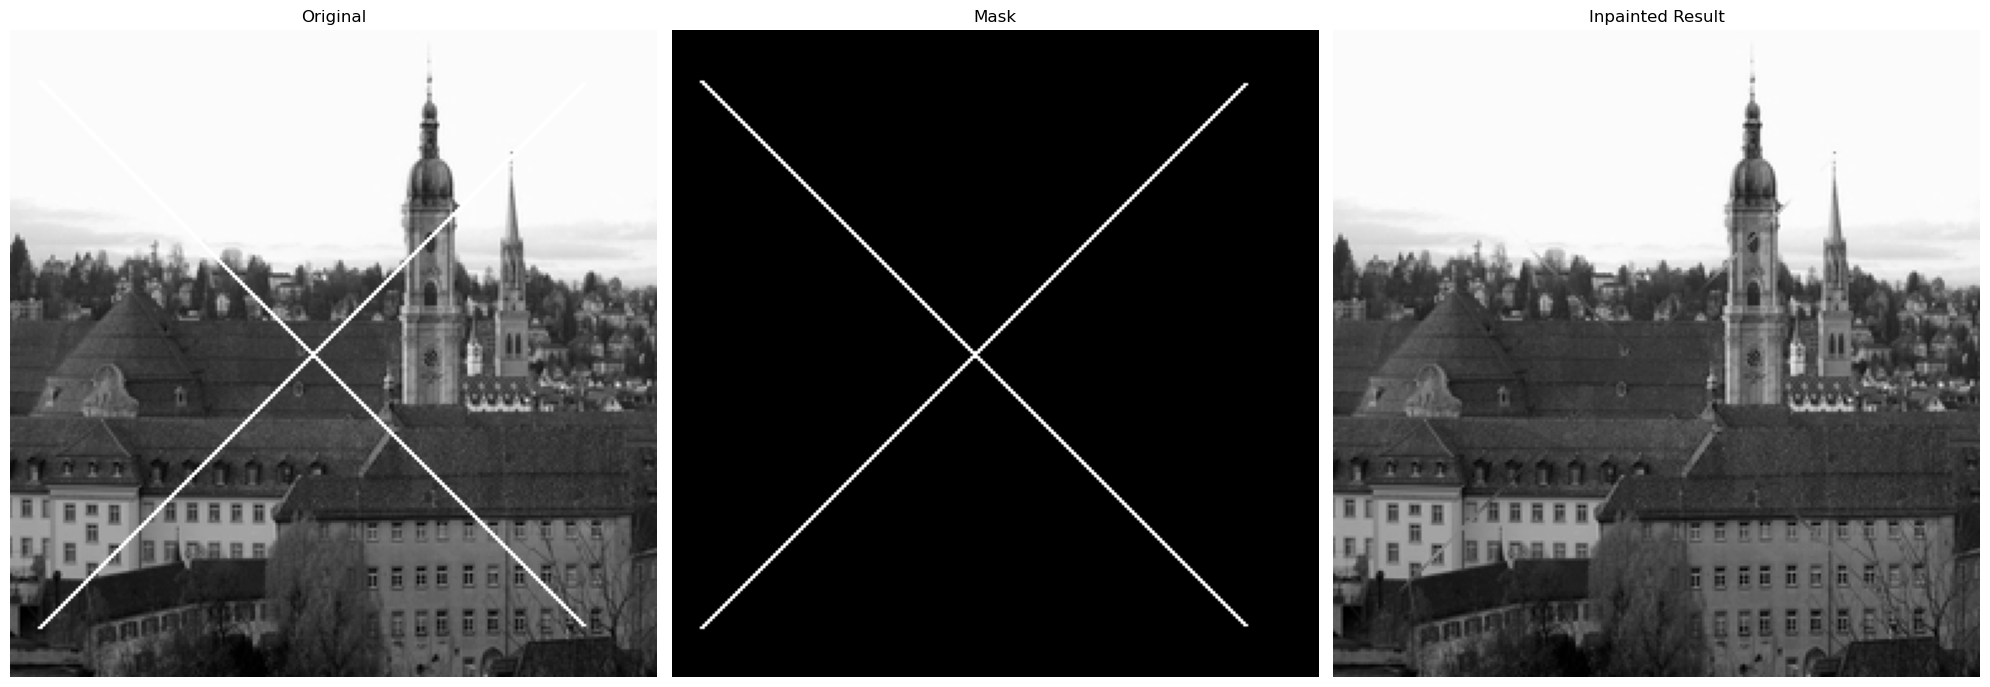

In [5]:

inpainted_image = nearestNeighbors(abbeyDamaged, thinMask)
showResults(abbeyDamaged, thinMask, inpainted_image)

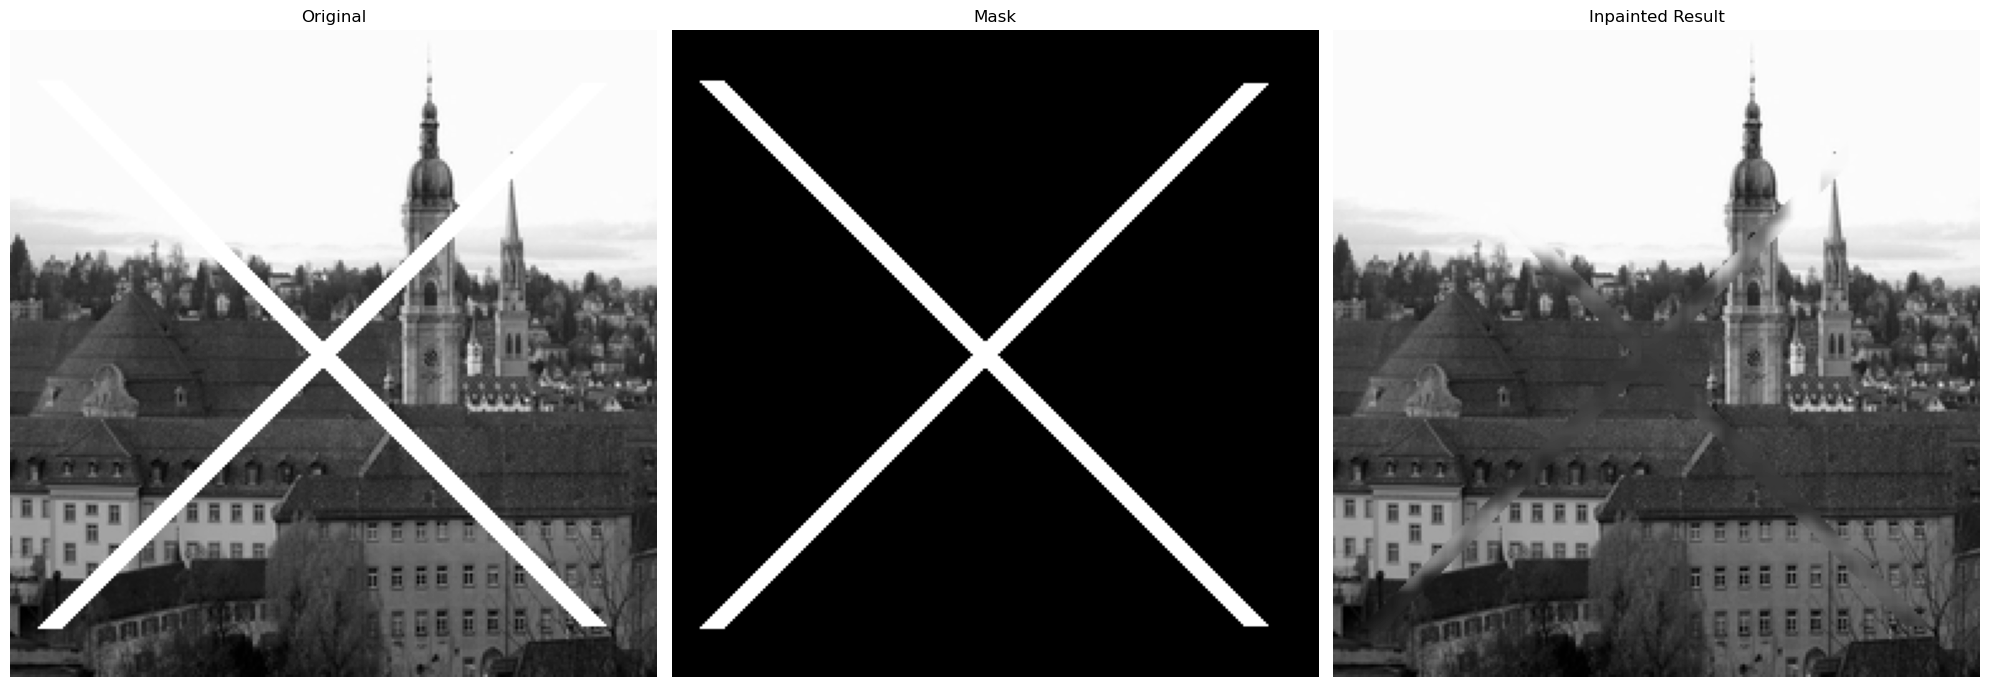

In [ ]:
inpainted_image = nearestNeighbors(abbeyDamaged2, thickMask)
showResults(abbeyDamaged2, thickMask, inpainted_image)

## Gaussian blur

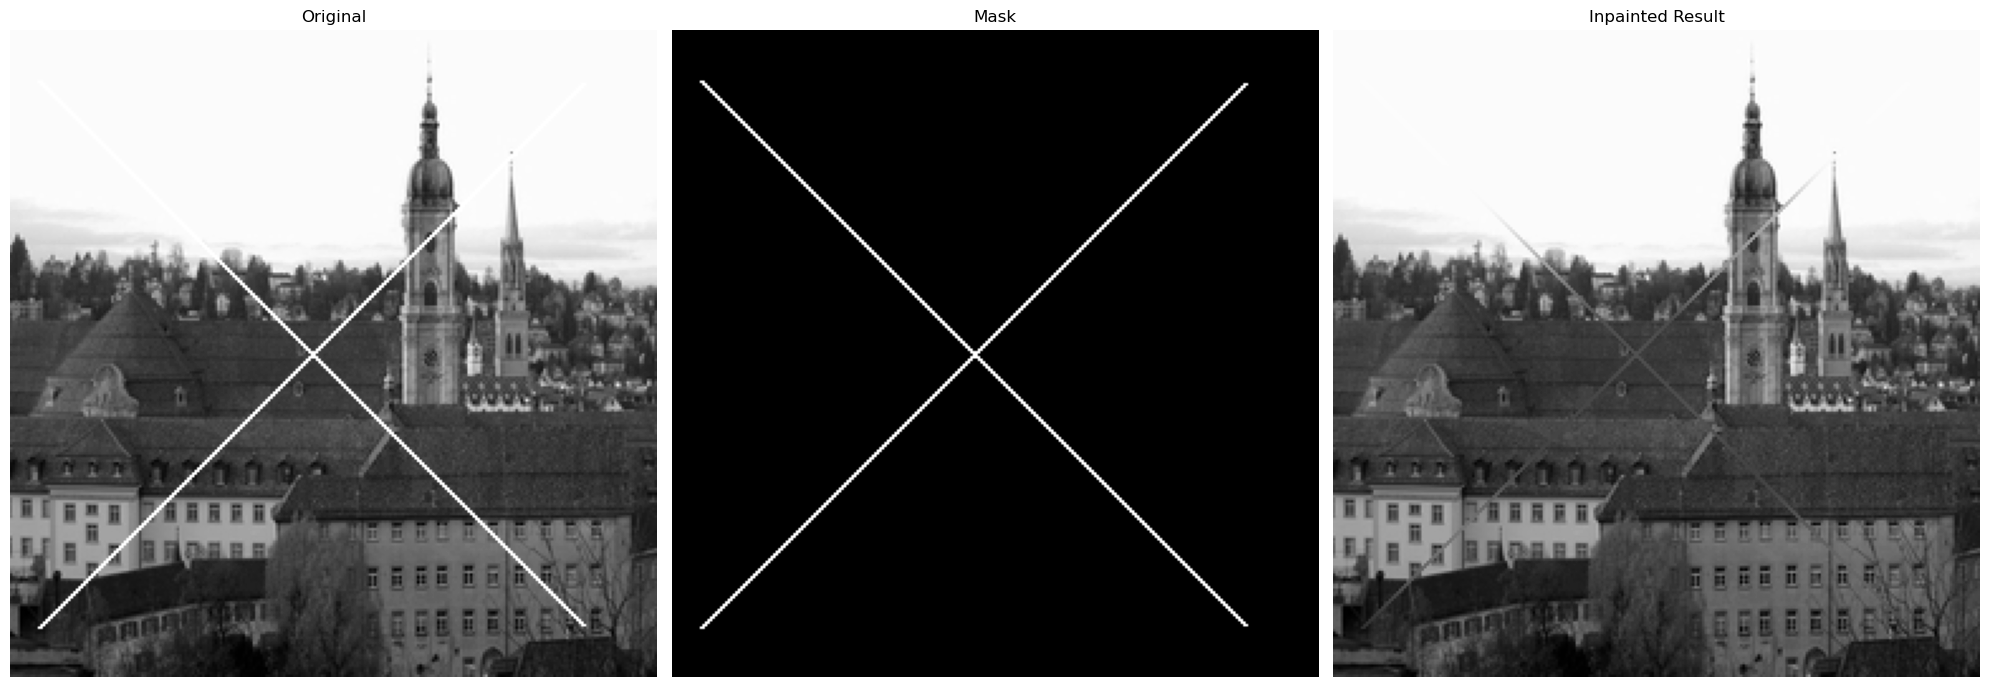

In [10]:
res = gaussianInpaint(abbeyDamaged, thinMask)
showResults(abbeyDamaged, thinMask, res)



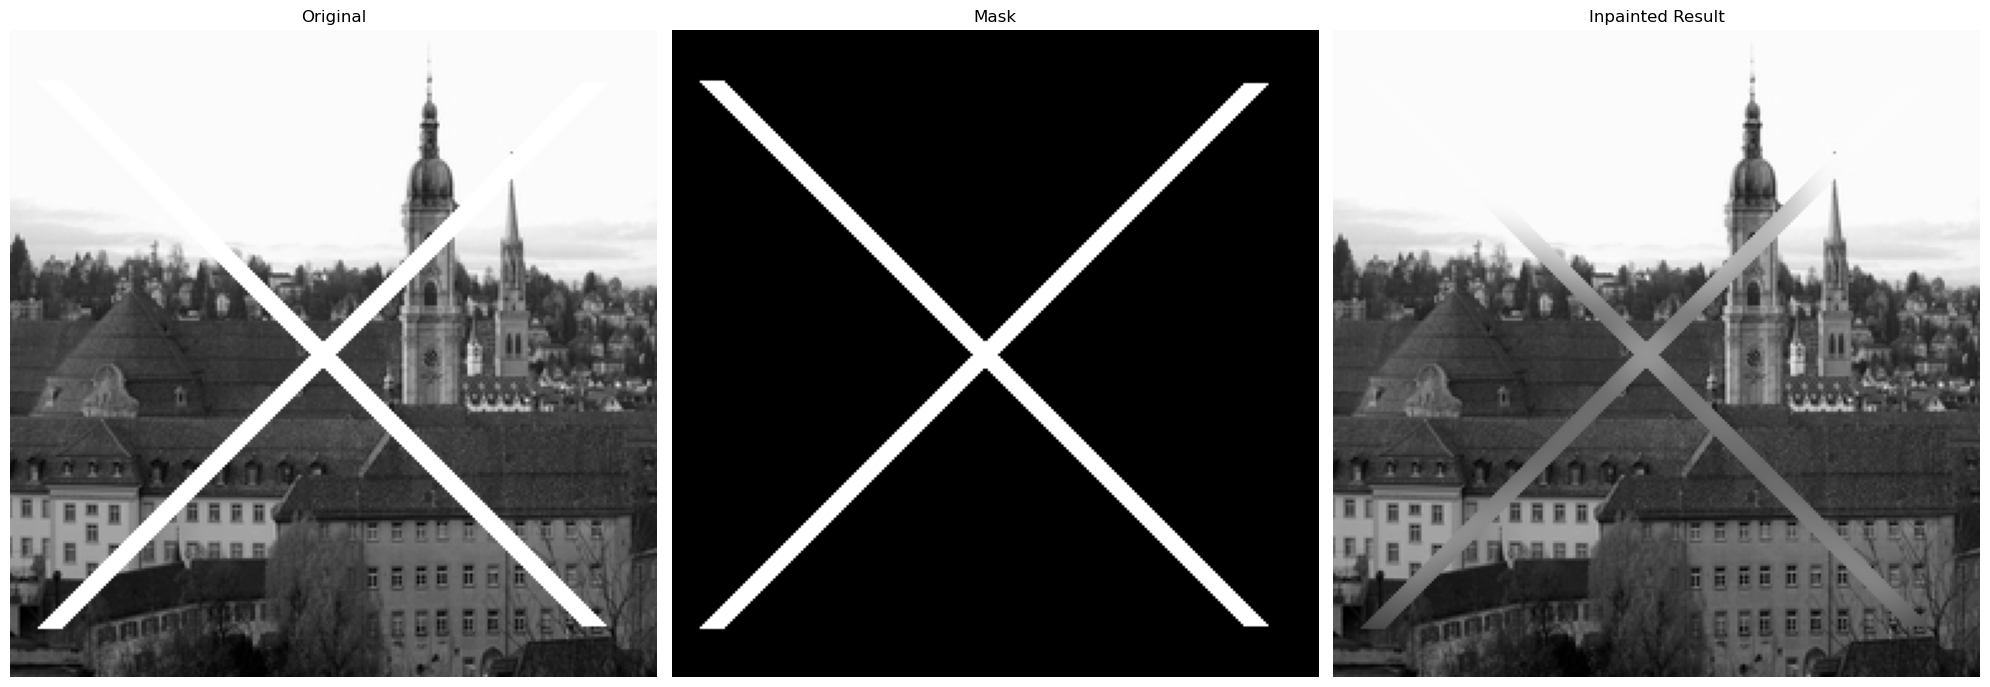

In [12]:
res = gaussianInpaint(abbeyDamaged2, thickMask)
showResults(abbeyDamaged2, thickMask, res)

## PDE method using isophote 

## STILL WORK IN PROGRESS


$$ \frac{\partial I}{\partial t} = \nabla (\Delta  I) \cdot (\nabla I)^\perp = 0 $$


I0 = circ_scratch.astype(np.float64)
dt = 0.01

In = I0

for i in range(50):

    lplIn = ndimage.laplace(In)
    gradx, grady = np.gradient(In)

    grad_perp_x = -1 * grady
    grad_perp_y = gradx

    # gradient ( laplacian In)
    grad_lap_x, grad_lap_y = np.gradient(lplIn)

    # dot product done manually
    update = (grad_lap_x * grad_perp_x) + (grad_lap_y * grad_perp_y)

    new_stuff = (  update * circ_mask)
    In_plus_1 = In + ( dt * update * circ_mask)

    In_plus_1 = np.clip(In_plus_1, 0, 255)

    #print("TYPES")
    #print("new stuff", type(new_stuff[0][0]))
    #print("img", type(In[0][0]))
    #print("new img", type(In_plus_1[0][0]))

    if i % 10 == 0:

        plt.figure(figsize=(15, 10))
        plt.subplot(131)
        plt.imshow(In, cmap='gray', vmin=0, vmax=255)
        plt.title(f'Iteration {i}')

        plt.subplot(133)
        plt.imshow(new_stuff, cmap='gray', vmin=0, vmax=255)
        plt.title('new stuff') 
        plt.tight_layout()


    In = In_plus_1
